In [2]:
import pandas as pd
import numpy as np
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline

# Wordcloud on clustering results

In [22]:
cluster_assignments = pd.read_csv('../data/clustering/progress_report2_assignment_backup.csv',index_col=0)

In [23]:
# max_cluster_metric

In [25]:
cluster_assignments.columns

Index(['pubId', 'canonicalUrl', 'firstScrape', 'title', 'text',
       'lang_reliability', 'lang_iso', 'title_len', 'text_len', 'label',
       'cluster__entity_tfidf', 'cluster__doc2vec', 'cluster__bow',
       'cluster__bert_spacy', 'cluster__bert', 'cluster__bow_lemma',
       'cluster__kmean_bow', 'cluster__bert_clean_spacy',
       'cluster__entity_tfidf_3:6', 'cluster__entity_tfidf_6:9',
       'cluster__entity_tfidf_9:12', 'cluster__entity_tfidf_12:15',
       'cluster__entity_tfidf_15:18', 'cluster__entity_tfidf_18:21',
       'cluster__entity_tfidf_21:24', 'cluster__entity_tfidf_24:27',
       'cluster__entity_tfidf_27:30'],
      dtype='object')

In [27]:
model_name = 'cluster__bert'
cluster_assignments[cluster_assignments[model_name] != -1]

,pubId,canonicalUrl,firstScrape,title,text,lang_reliability,lang_iso,title_len,text_len,label,...,cluster__bert_clean_spacy,cluster__entity_tfidf_3:6,cluster__entity_tfidf_6:9,cluster__entity_tfidf_9:12,cluster__entity_tfidf_12:15,cluster__entity_tfidf_15:18,cluster__entity_tfidf_18:21,cluster__entity_tfidf_21:24,cluster__entity_tfidf_24:27,cluster__entity_tfidf_27:30
62,290,zerohedge.com/news/2018-07-19/fbi-chief-threat...,7/19/2018 8:26:52 AM -04:00,FBI Chief Threatens To Quit If Trump Invites R...,"by Knave Dave - Jul 18, 2018 1:11 pm ### This ...",1,en,78,2858,helsinki,...,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
10741,33,washingtonpost.com/news/morning-mix/wp/2018/07...,7/19/2018 11:51:57 PM -04:00,At least 8 reported dead as duck boat sinks ne...,At least 8 reported dead as duck boat sinks ne...,1,en,91,856,duckboat,...,0,-1,1,-1,1,1,1,1,1,1
10846,33,washingtonpost.com/news/posteverything/wp/2018...,7/19/2018 6:27:03 AM -04:00,"Ukraine’s not a country, Putin told Bush. What...",PostEverything Perspective ### Perspective Int...,1,en,79,8487,helsinki,...,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
17136,34,bbc.co.uk/news/world-asia-44876108,7/19/2018 6:00:43 AM -04:00,Thai cave rescue: What we learned as boys tell...,Thai cave rescue: What we learned as boys tell...,1,en,52,6833,cave_rescue,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
17663,34,bbc.co.uk/news/world-asia-44868907,7/19/2018 5:27:31 AM -04:00,Thai cave rescue boys relive 'moment of miracle,Thai cave rescue boys relive 'moment of miracl...,1,en,47,4668,cave_rescue,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87720,685,14news.com/story/38679438/otters-top-crushers-...,7/19/2018 12:37:33 PM -04:00,Otters top Crushers thanks to four-run second ...,Otters top Crushers thanks to four-run second ...,1,en,88,3290,NaN,...,5,-1,-1,-1,-1,-1,-1,-1,-1,-1
45219,1935,cadillacnews.com/news/wexford-county-board-ste...,7/20/2018 4:28:35 AM -04:00,Wexford County board step closer to DEQ compli...,Don't have an account? Sign Up Today ### My Ac...,1,en,70,5280,NaN,...,2,4,4,4,4,1,4,4,4,3
30598,2,insider.espn.com/chalk/insider/story/_/id/2413...,7/19/2018 11:58:47 PM -04:00,MLB - Midseason baseball betting lessons and t...,MLB ### Insider ### Midseason MLB betting less...,1,en,54,1947,NaN,...,1,9,8,8,9,1,4,4,4,3
91492,7014,armstrongmywire.com/news/read/category/news/ar...,7/19/2018 10:48:12 AM -04:00,4 injured in blast at Pennsylvania Army depot...,The Latest: 4 injured in blast at Pennsylvania...,1,en,72,1968,NaN,...,5,-1,-1,-1,-1,8,4,8,3,3


In [7]:
def avg_tfidf(clustered_articles):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(clustered_articles)
    return np.mean(vectors, axis = 0), vectorizer

In [9]:
# for i in range(0, len(averaged_tfidfs)):
#     tf, vec = averaged_tfidfs[i]
#     wordcloud = WordCloud(background_color = 'white')
#     tfidfs = pd.DataFrame(tf, columns=vec.get_feature_names())
#     d = {}
#     for k,v in tfidfs.T.reset_index().values:
#         d[k] = v
#     d = {key: d[key] for key in d if key not in stopwords}
#     wc = wordcloud.generate_from_frequencies(d)
#     plt.figure()
#     plt.imshow(wc)
#     plt.axis("off")

In [10]:
import utils
utils.get_largest_cluster(cluster_assignments[model_name])

(-1, 5637)

In [11]:
count_df = cluster_assignments[cluster_assignments[model_name] != -1].groupby(['label', model_name]).size().reset_index(name='counts')

In [12]:
pred_df = count_df[count_df.groupby(['label'])['counts'].transform(max) == count_df['counts']].drop('counts', axis = 1)

In [13]:
pred_df.columns = ['prediction', model_name]

In [14]:
pred_articles = cluster_assignments.merge(pred_df, left_on=model_name, right_on=model_name)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import spacy
#get the noun, verb, word entity for each articles
nlp = spacy.load("en_core_web_sm")
noun_phrases_list = []
verb_phrases_list = []
entites_list = []
for text in pred_articles['text']:
    doc = nlp(text)
    noun_phrases_list.append([chunk.text for chunk in doc.noun_chunks])
    verb_phrases_list.append([token.lemma_ for token in doc if token.pos_ == "VERB"])
    entites_list.append([entity.text for entity in doc.ents])
    
import re

cleaned_entity_list = [[re.sub('[^a-zA-Z ]+', '', ent).strip() for ent in entites] for entites in entites_list]
cleaned_entity_list = [[ce for ce in cleaned_entities if ce != ''] for cleaned_entities in cleaned_entity_list]





In [17]:
pred_articles['cleaned_entities'] = [' '.join(c) for c in cleaned_entity_list]
averaged_tfidfs = pred_articles[['cleaned_entities','prediction']].groupby(['prediction'])['cleaned_entities'].agg(avg_tfidf)

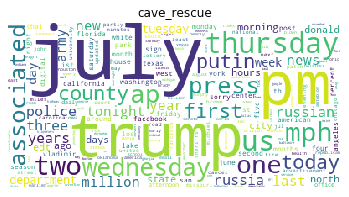

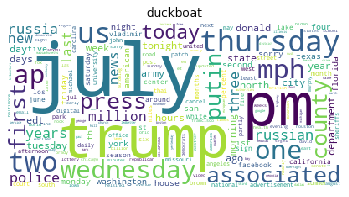

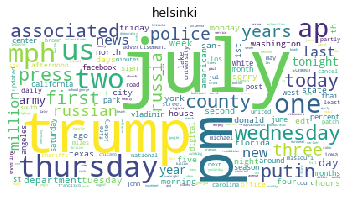

In [44]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

%matplotlib inline

stopwords = set(stopwords.words('english'))

events = averaged_tfidfs.index
for i in range(0, len(averaged_tfidfs)):
    tf, vec = averaged_tfidfs[i]
    wordcloud = WordCloud(background_color = 'white')
    tfidfs = pd.DataFrame(tf, columns=vec.get_feature_names())
    d = {}
    for k,v in tfidfs.T.reset_index().values:
        d[k] = v
    d = {key: d[key] for key in d if key not in stopwords}
    wc = wordcloud.generate_from_frequencies(d)
    
    plt.figure()
    plt.title(events[i])
    plt.imshow(wc)
    plt.axis("off")